# **<H1>MENTAL HEALTH PREDICTION<H1>**


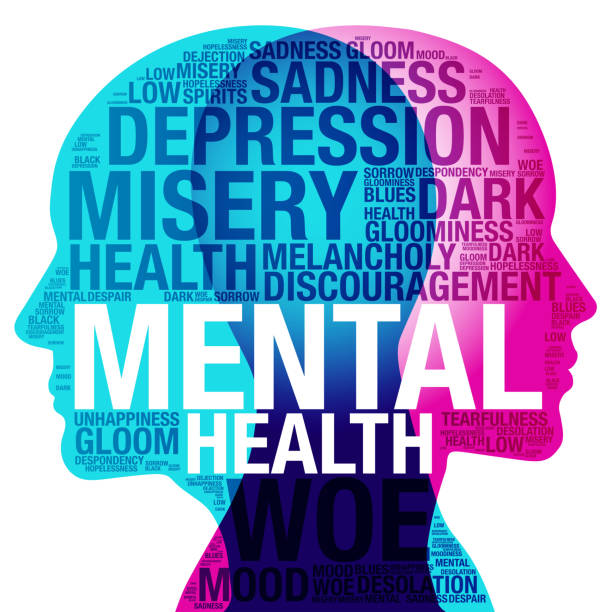

**<h1>Problem Definition</h1>**
**<h4>The Mental Health Prediction project aims to develop a model that assesses an <b>individual's mental stability</b> and <b>predicts whether they require mental health support</b>. The model evaluates various features, such as occupation, stress levels, coping mechanisms, and mental health history, to identify patterns or predictors of potential mental health issues. The goal is to facilitate early intervention by determining if an individual is at risk of mental health challenges. Specifically, the model focuses on students and professionals, predicting whether they need care or not based on their responses and behavioral indicators. This approach aims to identify those who may need timely mental health support to prevent further complications.</h4>**

**<h1>Why This Problem</h1>**
<h4>Mental health issues are increasingly prevalent, especially among students and professionals who face academic, career, and social pressures. These challenges often lead to stress, anxiety, and mood fluctuations, yet many individuals hesitate to seek help due to stigma or a lack of awareness. If left unaddressed, these issues can escalate into more severe conditions, such as depression or burnout.</h4>

<h4>Early identification of mental health concerns can significantly improve outcomes by providing timely support and reducing stigma. Mood swings, stress, and behavioral changes are early indicators that can be predicted through data-driven insights. This project leverages key features like occupation, stress levels, coping mechanisms, and mental health history to predict whether an individual needs mental health care.</h4>

<h4>By focusing on students and professionals, the project aims to provide early intervention, improve well-being, and prevent the escalation of mental health issues, ensuring timely support for those in need.</h4>

# **<h1>Approach</h1>**

## 1. Data Loading & Preprocessing:

* Load the mental health dataset using `pd.read_csv()`.
* Perform initial data exploration using `df.head()`, `df.shape`, `df.describe()`, and `df.info()` to understand the data's structure and characteristics.
* Handle missing values by dropping rows with nulls in the 'self_employed' column using `df.dropna()`. This ensures data quality for subsequent analysis.

## 2. Exploratory Data Analysis & Visualization:

* Visualize the distribution of categorical variables like 'Country' using bar charts created with `matplotlib.pyplot`. These visualizations help understand the frequency of different categories within the dataset.
* Generate bar charts for other categorical features to explore their distributions and gain insights into potential relationships with the target variable.
* Utilize `df[column].value_counts()` to get the frequency of unique values in each column, providing a quantitative understanding of data distribution.

## 3. Data Encoding:

* Encode categorical features using Label Encoding with `sklearn.preprocessing.LabelEncoder`. This transforms categorical data into numerical format, making it suitable for machine learning models.
* Remove the 'Timestamp' column, as it's not relevant for prediction, using `df.drop()`.
* Save the encoded dataset to a CSV file (`encoded_Mental_Health_Dataset.csv`) using `df.to_csv()` for later use and to avoid re-encoding.


## 4. Model Training and Evaluation:

* Train various classification models, including Decision Tree, Gaussian Naive Bayes, Random Forest, K-Nearest Neighbors
* Split the dataset into training and testing sets using `train_test_split()` to evaluate model generalization.
* Evaluate model performance using metrics such as accuracy, recall, precision, and F1-score.
* Compare the performance of different models to select the best-performing one.

## 5. Based on the Random forest we are making the prediction



In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.6 MB/s eta 0:00:00


**<h3>b. Pre Install this Library to use them for data processing, analysis, modeling, and visualization.<h1>**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings

from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder


**<h3>c. Reading the Dataset<h1>**

In [ ]:
df = pd.read_csv('/content/Mental Health Dataset.csv')
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


**<h3>d. Visualizing the Dataset shape.<h1>**

In [ ]:
df.shape

(292364, 17)

**<h3>e. Describing the Dataset.<h1>**

In [ ]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


**<h3>f. Display a concise summary of a DataFrame.<h1>**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

**<h3>g. Check for missing or NULL values in the DataFrame<h1>**

In [ ]:
df.isnull().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


**We have observed that there are missing values in self_employed so we have to clean it**


**As We have more data ,We are  just going to remove the feilds which have NULL values in self_employed**

In [ ]:
df = df.dropna(subset=['self_employed'])
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


**We are checking the sum if there are still any missing or NULL values.**

In [ ]:
df.isnull().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


**All the missing values are cleaned now**

In [ ]:
df.shape

(287162, 17)

**<h1>Data Visualization:<h1>**
**<h3>a. Plot bar charts for categorical variables, such as 'Country', to understand data distribution.<h1>**


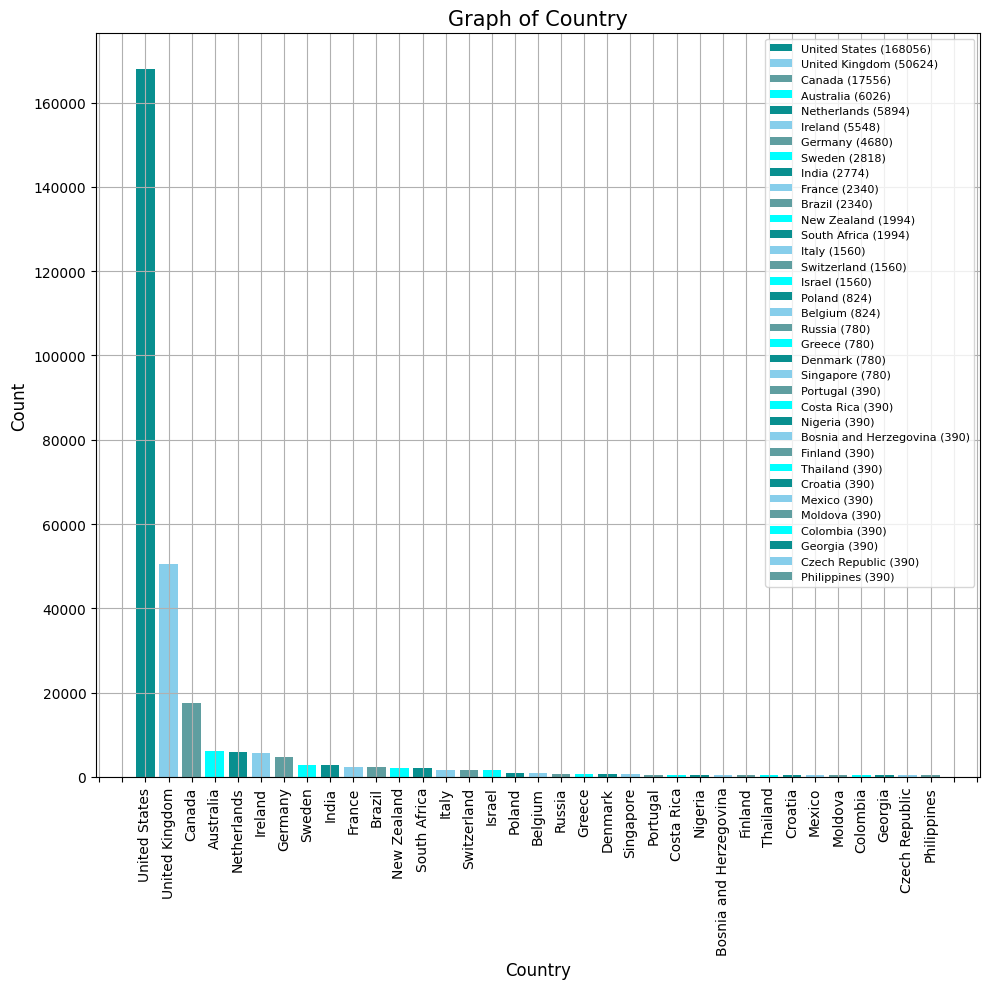

In [ ]:
specific_column = 'Country'

# Define the desired colors
legend_colors = ['#088F8F','#87CEEB',  '#5F9EA0', '#00FFFF']

plt.figure(figsize=(10, 10))

value_counts = df[specific_column].value_counts()
unique_values = value_counts.index

bars = plt.bar(unique_values, value_counts.values, color=legend_colors[:len(unique_values)])
plt.title(f'Graph of {specific_column}', fontsize=15)
plt.xlabel(specific_column, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, ha='center')
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

legend_labels = [f'{value} ({count})' for value, count in zip(unique_values, value_counts.values)]
plt.legend(bars, legend_labels, loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()


**<h3>b. Generating bar charts for each column in the DataFrame df (except the first column). It shows the distribution of values for each column as a separate plot.<h1>**

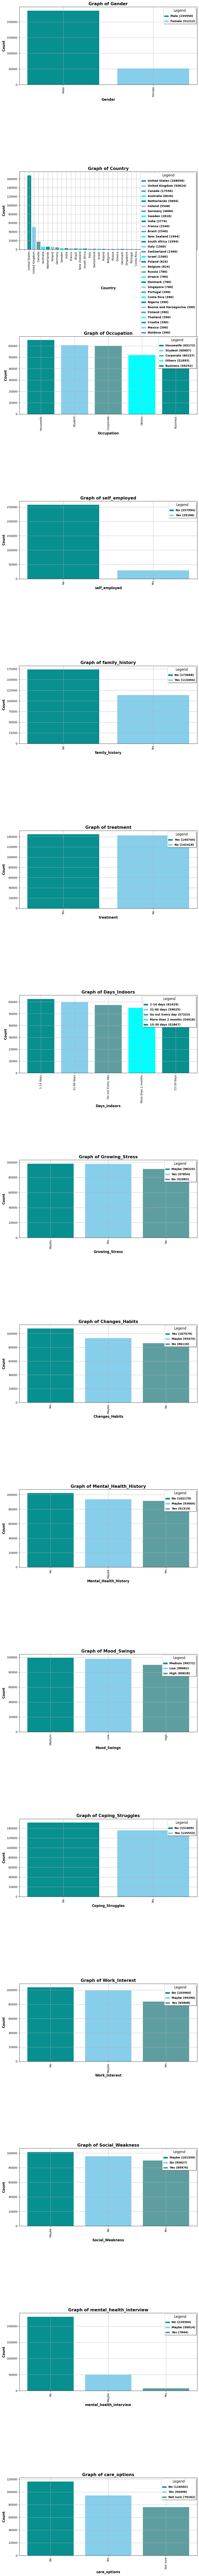

In [ ]:
legend_colors = ['#088F8F', '#87CEEB', '#5F9EA0', '#00FFFF']  # Specify your desired legend colors

plt.figure(figsize=(10, 8* (len(df.columns) - 1)))

for i, column in enumerate(df.columns[1:], start=1):
    value_counts = df[column].value_counts()
    unique_values = value_counts.index

    plt.subplot(len(df.columns) - 1, 1, i)
    bars = plt.bar(unique_values, value_counts.values, color=legend_colors[:len(unique_values)])
    plt.title(f'Graph of {column}', fontsize=15, fontweight='bold')  # Bold title
    plt.xlabel(column, fontsize=12, fontweight='bold')  # Bold column name
    plt.ylabel('Count', fontsize=12, fontweight='bold')  # Bold count
    plt.xticks(rotation=90, ha='center')
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

    legend_labels = [f'{value} ({count})' for value, count in zip(unique_values, value_counts.values)]
    legend_labels_bold = [f'{value} ({count})' for value, count in zip(unique_values, value_counts.values)]
    plt.legend(bars, legend_labels, loc='upper right', fontsize=8, title='Legend', title_fontsize='12', labelspacing=1, fancybox=True, framealpha=1, shadow=True)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='10', fontweight='bold')

plt.tight_layout()
plt.show()


**<h3>c. Printing each column's name along with the frequency of each unique value within that column in the DataFrame<h1>**

In [ ]:
for column in df.columns:
    print("Column:", column)
    print(df[column].value_counts())
    print()


Column: Timestamp
Timestamp
8/27/2014 11:43    2384
8/27/2014 12:31    2340
8/27/2014 12:53    1648
8/27/2014 16:21    1604
8/27/2014 12:39    1604
                   ... 
9/1/2014 8:19       390
9/1/2014 8:23       390
9/1/2014 9:12       390
9/1/2014 9:15       390
9/1/2014 12:00      390
Name: count, Length: 574, dtype: int64

Column: Gender
Gender
Male      235950
Female     51212
Name: count, dtype: int64

Column: Country
Country
United States             168056
United Kingdom             50624
Canada                     17556
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Italy                       1560
Switzerland                 1560
Israel                      1560
Poland                       824


**<h1>Encoding Categorical Data<h1>**
**<h3>a. Remove Timestamp and encode the code the data and save the encoded file then reload it back into the dataframe.<h1>**



In [ ]:
df = df.drop(columns=['Timestamp'])
# Define columns to be label encoded
columns_to_encode = [
    'Gender', 'Country', 'Occupation', 'treatment', 'Mental_Health_History',
    'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
    'mental_health_interview', 'care_options', 'self_employed',
    'family_history', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mood_Swings'
]

# Apply label encoding
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string to handle potential nulls or mixed types

encoded_file_path = '/content/encoded_Mental_Health_Dataset.csv'
df.to_csv(encoded_file_path, index=False)

# Display the first few rows to verify
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2
5,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0,1
6,0,0,1,0,1,1,0,2,1,2,2,0,1,2,1,1
7,0,34,1,0,0,0,0,2,1,2,2,0,1,2,1,0


**<h3>b. Visualize Shape of the Encoded data frame:<h1>**


In [ ]:
df.shape

(287162, 16)

**<h3>c. Description about the Encoded data frame:<h1>**

In [ ]:
df.describe()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000,287162.000000
mean,0.821662,28.728000,2.050863,0.101573,0.395226,0.504050,1.963205,0.998708,1.049122,0.991834,1.032887,0.472044,0.945738,0.959664,0.853149,0.923374
std,0.382798,10.140517,1.385281,0.302087,0.488900,0.499984,1.420193,0.826328,0.835299,0.802566,0.810823,0.499219,0.796880,0.815701,0.424167,0.853761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,33.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,34.000000,2.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,34.000000,3.000000,0.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000
max,1.000000,34.000000,4.000000,1.000000,1.000000,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000


**<h3>d. Printing each column's name along with the frequency of each unique value within that column in the DataFrame<h1>**

In [ ]:
for column in df.columns:
    print("Column:", column)
    print(df[column].value_counts())
    print()


Column: Gender
Gender
1    235950
0     51212
Name: count, dtype: int64

Column: Country
Country
34    168056
33     50624
4      17556
0       6026
21      5894
16      5548
13      4680
30      2818
15      2774
11      2340
3       2340
22      1994
29      1994
18      1560
31      1560
17      1560
25       824
1        824
27       780
14       780
9        780
28       780
26       390
6        390
23       390
2        390
10       390
32       390
7        390
19       390
20       390
5        390
12       390
8        390
24       390
Name: count, dtype: int64

Column: Occupation
Occupation
2    65173
4    60687
1    60157
3    51893
0    49252
Name: count, dtype: int64

Column: self_employed
self_employed
0    257994
1     29168
Name: count, dtype: int64

Column: family_history
family_history
0    173668
1    113494
Name: count, dtype: int64

Column: treatment
treatment
1    144744
0    142418
Name: count, dtype: int64

Column: Days_Indoors
Days_Indoors
0    62429
2    5962

**<h3>e. Creating individual bar plots for each column in the DataFrame df, including the first column and printing the unique values.<h1>**

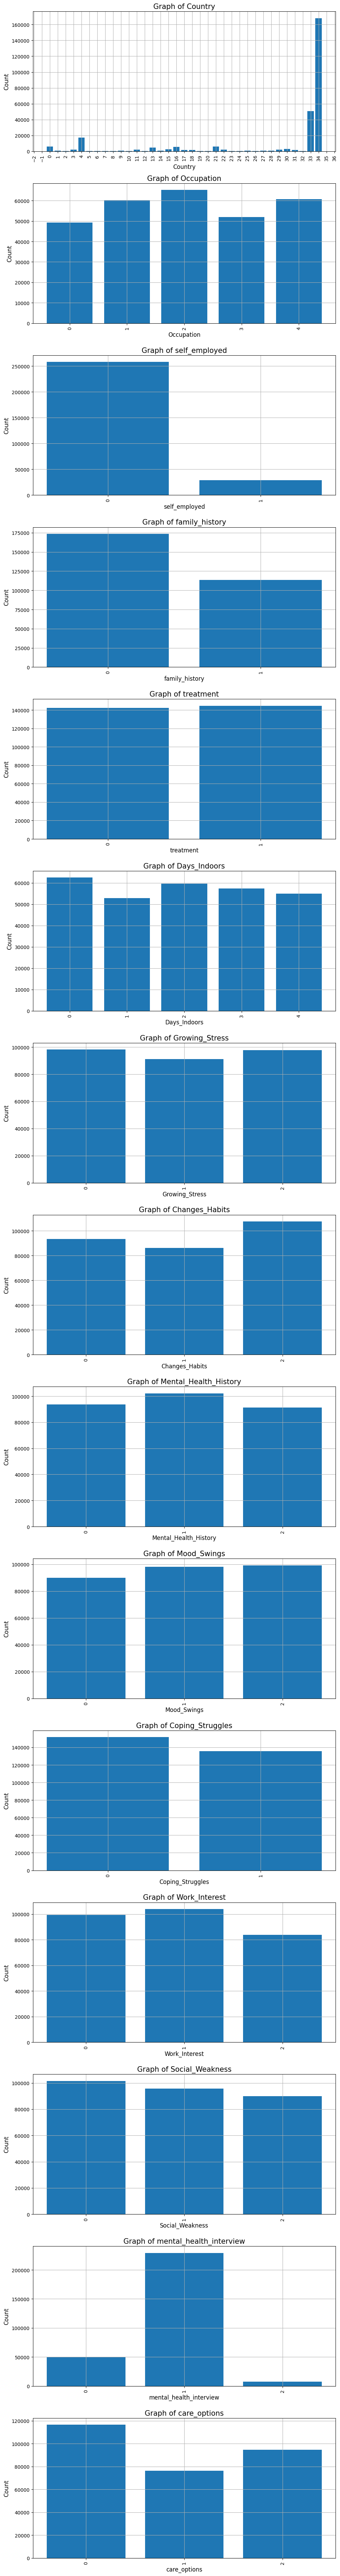

In [ ]:
plt.figure(figsize=(10, 5 * (len(df.columns) - 1)))

for i, column in enumerate(df.columns[1:], start=1):
    value_counts = df[column].value_counts()
    plt.subplot(len(df.columns) - 1, 1, i)
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'Graph of {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90, ha='center')  # Set rotation to 90 degrees and horizontal alignment to center
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.tight_layout()
plt.show()

**<h3>f. Printing the column name followed by the unique values present in that column.<h1>**

In [ ]:
for column in df:
  print(column)
  print(df[column].unique(), '\n')

Gender
[0 1] 

Country
[34 25  0  4 33 29 30 22 21 15  1 16 11 26  3  6 27 13 31 10 17 18  2 28
 23  7 32  9 19 14 20  5 12  8 24] 

Occupation
[1 4 0 2 3] 

self_employed
[0 1] 

family_history
[1 0] 

treatment
[1 0] 

Days_Indoors
[0 3 4 1 2] 

Growing_Stress
[2 1 0] 

Changes_Habits
[1 2 0] 

Mental_Health_History
[2 1 0] 

Mood_Swings
[2 1 0] 

Coping_Struggles
[0 1] 

Work_Interest
[1 0 2] 

Social_Weakness
[2 1 0] 

mental_health_interview
[0 1 2] 

care_options
[2 1 0] 



**<h1>Training the Decision Tree, GuassianNB, RandomForest ,KNN models with target variable as gender and with the rest of the features**

In [ ]:
# Define Features and Target
Features = ['care_options', 'Social_Weakness', 'self_employed', 'family_history',
            'treatment', 'Days_Indoors', 'Growing_Stress',
            'Changes_Habits', 'Mental_Health_History',
            'Coping_Struggles', 'Work_Interest']
Target = 'Gender'

# Placeholder for model metrics
model_metrics = []

# Define a function to evaluate models
def evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name):
    model.fit(X_train, Y_train)
    result = model.predict(X_test)

    ac_sc = accuracy_score(Y_test, result)
    rc_sc = recall_score(Y_test, result, average="weighted")
    pr_sc = precision_score(Y_test, result, average="weighted")
    f1_sc = f1_score(Y_test, result, average='micro')
    confusion_m = confusion_matrix(Y_test, result)

    # Append metrics to list
    model_metrics.append((model_name, ac_sc, rc_sc, pr_sc, f1_sc))

    print(f"========== {model_name} ==========")
    print("Accuracy    : ", ac_sc)
    print("Recall      : ", rc_sc)
    print("Precision   : ", pr_sc)
    print("F1 Score    : ", f1_sc)
    print("Confusion Matrix: ")
    print(confusion_m)
    print("\n")

# Load your data
# Assuming 'df' is your dataframe and 'Features' and 'Target' are the columns you're using
X_train, X_test, Y_train, Y_test = train_test_split(df[Features], df[Target], test_size=0.2, random_state=42)

# Models to evaluate
models = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (GaussianNB(), "Gaussian Naive Bayes"),
    (RandomForestClassifier(), "Random Forest Classifier"),
    (KNeighborsClassifier(n_neighbors=1000), "KNN")
]

# Evaluate each model
for model, model_name in models:
    evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name)

# Determine and print the best model based on accuracy
best_model = max(model_metrics, key=lambda x: x[1])  # Based on accuracy score
print("========== Best Model ==========")
print(f"Best Model: {best_model[0]}")
print("Accuracy    : ", best_model[1])
print("Recall      : ", best_model[2])
print("Precision   : ", best_model[3])
print("F1 Score    : ", best_model[4])

========== Decision Tree ==========
Accuracy    :  0.9688158375846638
Recall      :  0.9688158375846638
Precision   :  0.969496751574672
F1 Score    :  0.9688158375846638
Confusion Matrix: 
[[ 8462  1701]
 [   90 47180]]


========== Gaussian Naive Bayes ==========
Accuracy    :  0.7991050441383873
Recall      :  0.7991050441383873
Precision   :  0.7549891598615176
F1 Score    :  0.7991050441383873
Confusion Matrix: 
[[ 1758  8405]
 [ 3133 44137]]


========== Random Forest Classifier ==========
Accuracy    :  0.9688854839552173
Recall      :  0.9688854839552173
Precision   :  0.9696707603376067
F1 Score    :  0.9688854839552173
Confusion Matrix: 
[[ 8443  1720]
 [   67 47203]]


========== KNN ==========
Accuracy    :  0.8283913429561403
Recall      :  0.8283913429561403
Precision   :  0.8547274779654914
F1 Score    :  0.8283913429561403
Confusion Matrix: 
[[  313  9850]
 [    6 47264]]


========== Best Model ==========
Best Model: Random Forest Classifier
Accuracy    :  0.9688854839

**Making the Prediction**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Features and Target
Features = ['Country', 'treatment', 'Social_Weakness', 'family_history', 'mental_health_interview']
Target = 'care_options'

# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(
    df[Features], df[Target], test_size=0.2, random_state=42, stratify=df[Target]
)




# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Model
rf_model.fit(X_train, Y_train)

# Function to Predict Mental Health Outcome Based on User Input
def predict_mental_health():
    """Predicts mental health outcome based on user input."""
    # Collect user input
    user_data = {
        'Gender': input("Gender (1 for Male, 0 for Female): "),
        'Country': input("Country (0 for Australia, ....,15 for India,....., 34 for USA ): "),
        'Occupation': input("Occupation 4 for Student, 1 for corporate, 2 for Housewife, 0 Business and 3 for others etc.): "),
        'self_employed': input("Self Employed (1 for Yes, 0 for No): "),
        'family_history': input("Family History (1 for Yes, 0 for No): "),
        'treatment': input("Treatment (1 for Yes, 0 for No): "),
        'Days_Indoors': input("Days Indoors 0 for (1-14 days), 1 for (15-30 days), 2 for (31-60 days), 3 for Go out everyday and 4 for more than two months: "),
        'Growing_Stress': input("Growing Stress (2 for Yes, 0 for No and 1 for Maybe): "),
        'Changes_Habits': input("Changes in Habits (2 for Yes, 0 for No and 1 for Maybe): "),
        'Mental_Health_History': input("Mental Health History (2 for Yes, 0 for No and 1 for Maybe): "),
        'Mood_Swings': input("Mood Swings (2 for low,1 for Medium, 0 for high): "),
        'Coping_Struggles': input("Coping Struggles (1 for Yes, 0 for No): "),
        'Work_Interest': input("Work Interest (2 for Yes, 0 for No and 1 for Maybe): "),
        'Social_Weakness': input("Social Weakness (2 for Yes, 0 for No and 1 for Maybe): "),
        'mental_health_interview': input("Mental Health Interview (2 for Yes, 0 for No and 1 for Maybe): ")
    }

    # Create DataFrame from user input
    input_df = pd.DataFrame([user_data])

    # Convert input features to numeric if necessary
    for feature in Features:
        try:
            input_df[feature] = pd.to_numeric(input_df[feature])
        except ValueError:
            print(f"Warning: Could not convert '{feature}' to numeric. Using as string.")

    # Ensure the input DataFrame has the same columns as the training data
    input_df = input_df[Features]

    # Make prediction
    prediction = rf_model.predict(input_df)

    # Print the prediction result
    if prediction[0] == 2:
        print("\nThe model predicts that you need care.")
    elif prediction[0] == 0:
        print("\nThe model predicts that you do not need care.")
    elif prediction[0] == 1:
        print("\nThe model predicts not sure that you need care.")
    else:
        print("\nInvalid prediction value.")

# Call the function to start prediction
predict_mental_health()


Gender (1 for Male, 0 for Female): 1
Country (0 for Australia, ....,15 for India,....., 34 for USA ): 15
Occupation 4 for Student, 1 for corporate, 2 for Housewife, 0 Business and 3 for others etc.): 4
Self Employed (1 for Yes, 0 for No): 1
Family History (1 for Yes, 0 for No): 1
Treatment (1 for Yes, 0 for No): 1
Days Indoors 0 for (1-14 days), 1 for (15-30 days), 2 for (31-60 days), 3 for Go out everyday and 4 for more than two months: 4
Growing Stress (2 for Yes, 0 for No and 1 for Maybe): 2
Changes in Habits (2 for Yes, 0 for No and 1 for Maybe): 2
Mental Health History (2 for Yes, 0 for No and 1 for Maybe): 2
Mood Swings (2 for low,1 for Medium, 0 for high): 0
Coping Struggles (1 for Yes, 0 for No): 1
Work Interest (2 for Yes, 0 for No and 1 for Maybe): 0
Social Weakness (2 for Yes, 0 for No and 1 for Maybe): 2
Mental Health Interview (2 for Yes, 0 for No and 1 for Maybe): 2

The model predicts that you need care.
